In [1]:
# K-Means Clustering

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv("../bases/Mall_Customers.csv", sep = ",")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
X = dataset.iloc[:, [3, 4]].values

Ficamos com as variáveis 3 e 4 do conjunto de dados, que correspondem à receita anual em milhares e à pontuação do cliente.

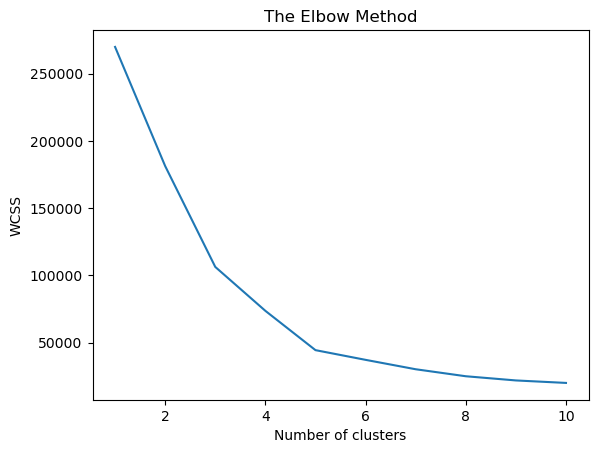

In [4]:
# Método Elbow para encontrar o número ideal de clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# https://es.wikipedia.org/wiki/K-medias

No bloco anterior geramos os clusters para valores de 1 a 10 (na faixa de 1 a 11) e obtivemos para cada um deles, a soma das distâncias com o tributo inertia_ do objeto kmeans. No gráfico observamos que a diminuição na soma das distâncias é atenuada quando o número de clusters é igual a 5, portanto, para este caso prático, o número ótimo de clusters será 5.

In [5]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

Para observar graficamente a atribuição dos 200 clientes a 5 grupos ou clusters, fazemos o seguinte, atribuímos uma cor a cada grupo e marcamos os centróides em amarelo:

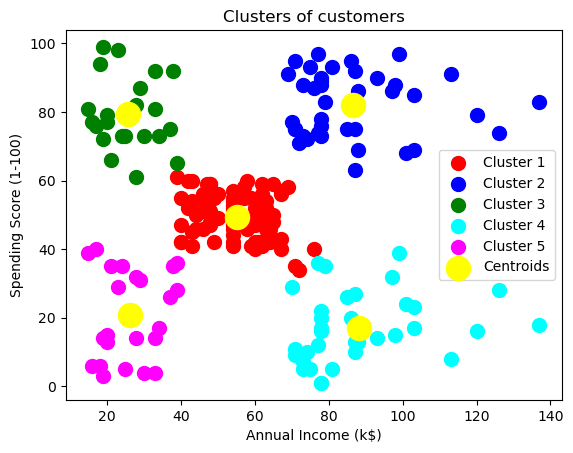

In [6]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()